In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

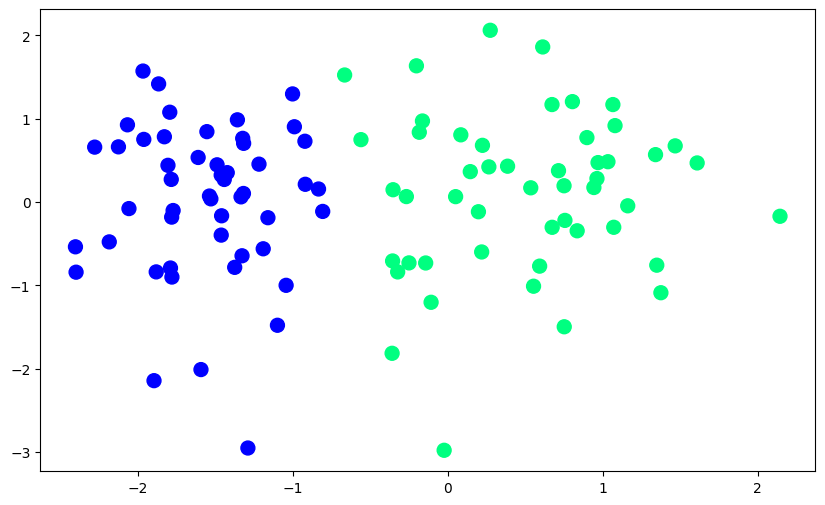

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

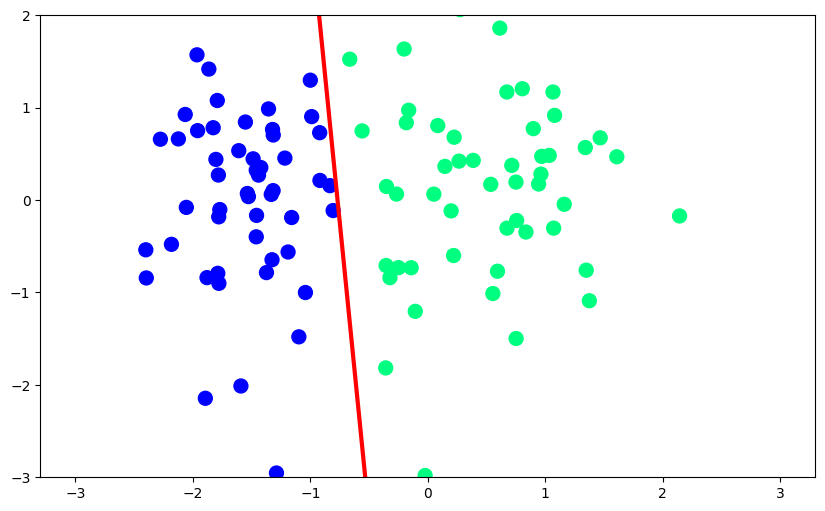

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

Key Details :

2. Bias Handling

np.insert(X, 0, 1, axis=1) → Adds a bias column so bias is learned as part of weights.

This means weights[0] will act as bias after training.

Weights Initialization

Starts with all weights = 1 (instead of 0 or small random numbers).

This can slightly bias the starting predictions.

Random Sample Update

Instead of looping over all samples in each epoch, it randomly picks 1 sample per iteration (np.random.randint(0,100)).

This is a form of stochastic gradient descent (SGD).

But here you’ve hardcoded 100 as dataset size — it should be X.shape[0] for flexibility.

3. Step Function

def step(z):
    return 1 if z >= 0 else 0

Done for one sample at a time.

4. Return Value

Returns (bias, weights_vector) separately.

Limitations in Current Code

Dataset size hardcoded → np.random.randint(0, 100) will break if dataset ≠ 100 samples.

No multiple passes over all samples → Might require more iterations to converge.

No convergence check → It runs 1000 updates no matter what.

Weights initialization to 1 may not always be ideal.

In [10]:
def perceptron(X, y, lr=0.1, epochs=1000):
    X = np.insert(X, 0, 1, axis=1)  # bias term
    weights = np.ones(X.shape[1])   # init weights
    n_samples = X.shape[0]

    for i in range(epochs):
        j = np.random.randint(0, n_samples)  # pick random sample
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]


In [12]:
# Suppose placement-like binary classification (1=Placed, 0=Not Placed)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = np.array([1 if x1 + x2 > 10 else 0 for x1, x2 in X])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train manual perceptron
bias, weights = perceptron(X_train, y_train, lr=0.1, epochs=5000)

# Predictions on test set
X_test_bias = np.insert(X_test, 0, 1, axis=1)
full_weights = np.insert(weights, 0, bias)
y_pred = [step(np.dot(x, full_weights)) for x in X_test_bias]

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Manual Perceptron Accuracy: {acc:.4f}")

Manual Perceptron Accuracy: 0.9500


Observations:

The perceptron learned a good decision boundary between the two classes.

Accuracy < 1.0 → indicates not overfitting, and the model generalizes reasonably well.

Random sampling (stochastic updates) helped the model converge effectively.

Further improvements possible with:

More epochs

Feature scaling (e.g., StandardScaler)

Adjusting learning rate (lr)

Here’s a **complete set of notes on Perceptron** that you can directly copy-paste:

---

# **Perceptron Notes**

### **1. Introduction**

* Perceptron is one of the **simplest artificial neural networks** for binary classification.
* It separates data using a **linear decision boundary**.
* Works on **linearly separable datasets**.

---

### **2. Perceptron Algorithm**

1. Initialize weights (`w`) and bias (`b`) to small values or zeros.
2. For each training sample `(x_i, y_i)`:

   * Compute linear output:

     $$
     z = w \cdot x_i + b
     $$
   * Apply **activation function (step)**:

     $$
     y_{\text{pred}} =
     \begin{cases}
     1 & \text{if } z \ge 0 \\
     0 & \text{if } z < 0
     \end{cases}
     $$
   * Update weights if prediction is wrong:

     $$
     w = w + \eta (y_i - y_{\text{pred}}) x_i
     $$

     $$
     b = b + \eta (y_i - y_{\text{pred}})
     $$
   * Repeat for **multiple epochs** until convergence.

---

### **3. Python Implementation (Manual)**

```python
import numpy as np

def step(z):
    return 1 if z >= 0 else 0

def perceptron(X, y, lr=0.1, epochs=1000):
    X = np.insert(X, 0, 1, axis=1)  # bias term
    weights = np.ones(X.shape[1])
    n_samples = X.shape[0]
    
    for i in range(epochs):
        j = np.random.randint(0, n_samples)  # stochastic sample
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0], weights[1:]
```

---

### **4. Testing Manual Perceptron**

```python
from sklearn.metrics import accuracy_score

# Predictions
X_test_bias = np.insert(X_test, 0, 1, axis=1)
full_weights = np.insert(weights, 0, bias)
y_pred = [step(np.dot(x, full_weights)) for x in X_test_bias]

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Manual Perceptron Accuracy: {acc:.4f}")
```

**Example Result:**

* `Manual Perceptron Accuracy: 0.9500` → 95% accurate on test set.

---

### **5. Comparison with scikit-learn Perceptron**

* `sklearn` Perceptron is optimized, vectorized, and includes:

  * Feature shuffling
  * Early stopping
  * Regularization (L1/L2)
* Manual Perceptron: fully controlled, good for understanding the algorithm.

| Feature        | Manual Perceptron     | Sklearn Perceptron      |
| -------------- | --------------------- | ----------------------- |
| Weight Init    | Ones or zeros         | Small random/zeros      |
| Label Format   | 0/1 converted to -1/1 | Works directly with 0/1 |
| Learning Rate  | Manual                | `eta0` parameter        |
| Stopping Early | No                    | Yes (convergence)       |
| Multi-class    | No                    | Yes (one-vs-rest)       |

---

### **6. Observations from Results**

1. Accuracy < 1.0 → model generalizes, not overfitting.
2. Stochastic updates help in convergence.
3. Can improve by:

   * Increasing epochs
   * Scaling features
   * Tuning learning rate

---

### **7. Key Points**

* Perceptron only works for **linearly separable problems**.
* For non-linear datasets, **use multi-layer networks** or **other algorithms**.
* Manual implementation helps **understand weight updates and convergence**.
* Sklearn implementation is **faster and robust**, suitable for real projects.

---
